In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from plotnine import *
import plotnine

%matplotlib inline

In [2]:
grav = 'GR_b64n512'
NFW_f = 0.02
rs_f = 1.0

In [3]:
d = pd.read_csv("./under.csv")\
    .dropna()

In [4]:
_d = d[
    (d['grav'] == grav) &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

x, y = _d['rho_f'], _d['rho_s']

In [5]:
def f_0(x, a):
    return a + x

popt_0, _ = curve_fit(f_0, x, y)

print(sum((f_0(x, *popt_0) - y)**2.0) / float(len(y) - len(popt_0)))

0.006463667266992264


In [6]:
def f_1(x, a, b):
    return a + b*x

popt_1, _ = curve_fit(f_1, x, y)

print(sum((f_1(x, *popt_1) - y)**2.0) / float(len(y) - len(popt_1)))

0.005989608736192211


In [7]:
def f_2(x, a, b, c):
    return a + b*x + c*x*x

popt_2, _ = curve_fit(f_2, x, y)

print(sum((f_2(x, *popt_2) - y)**2.0) / float(len(y) - len(popt_2)))

0.006022884209333035


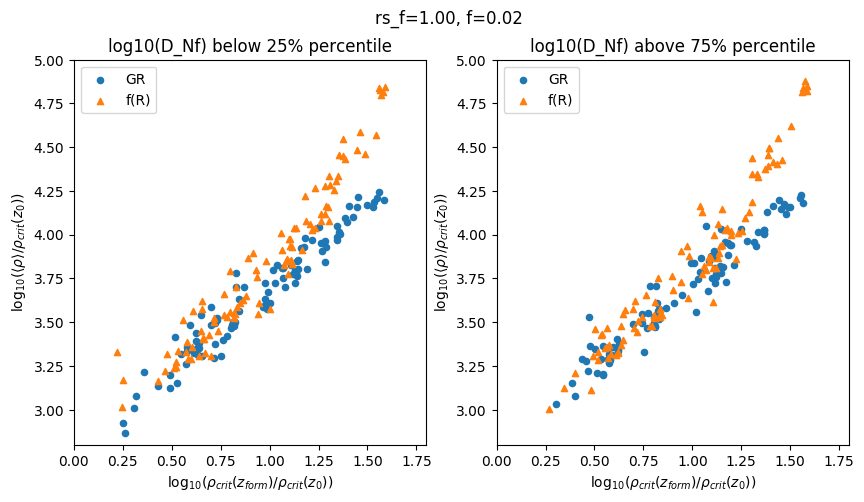

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle("rs_f=%.2f, f=%.2f" % (rs_f, NFW_f))

d = pd.read_csv("./under.csv").dropna()
d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[0], kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label='GR')
d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[0], kind='scatter', x='rho_f', y='rho_s', marker='^', c='C1', label='f(R)')
ax[0].set_title("log10(D_Nf) below 25% percentile")

d = pd.read_csv("./over.csv").dropna()
d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[1], kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label='GR')
d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[1], kind='scatter', x='rho_f', y='rho_s', marker='^', c='C1', label='f(R)')
ax[1].set_title("log10(D_Nf) above 75% percentile")

# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), np.log10(400)), label='C=400', c='C2')
# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), *popt_0), label='C=%d' % 10**popt_0[0], c='C3')
# ax.plot(np.linspace(0, 2), f_1(np.linspace(0, 2), *popt_1), label='ax+b', c='C2')

for a in ax:
    a.set_xlim((0, 1.8))
    a.set_ylim((2.8, 5))
    a.set_ylabel(r"$\log_{10}(\langle\rho\rangle / \rho_{crit}(z_0))$")
    a.set_xlabel(r"$\log_{10}(\rho_{crit} (z_{form}) / \rho_{crit}(z_0))$")

# plt.savefig("./fig_split_D_Nf.pdf")

In [9]:
d = pd.read_csv("./output/result.nfw.csv")\
    .dropna()

/cosma/home/dp004/dc-oles1/.local/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/cosma/home/dp004/dc-oles1/.local/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/cosma/home/dp004/dc-oles1/.local/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


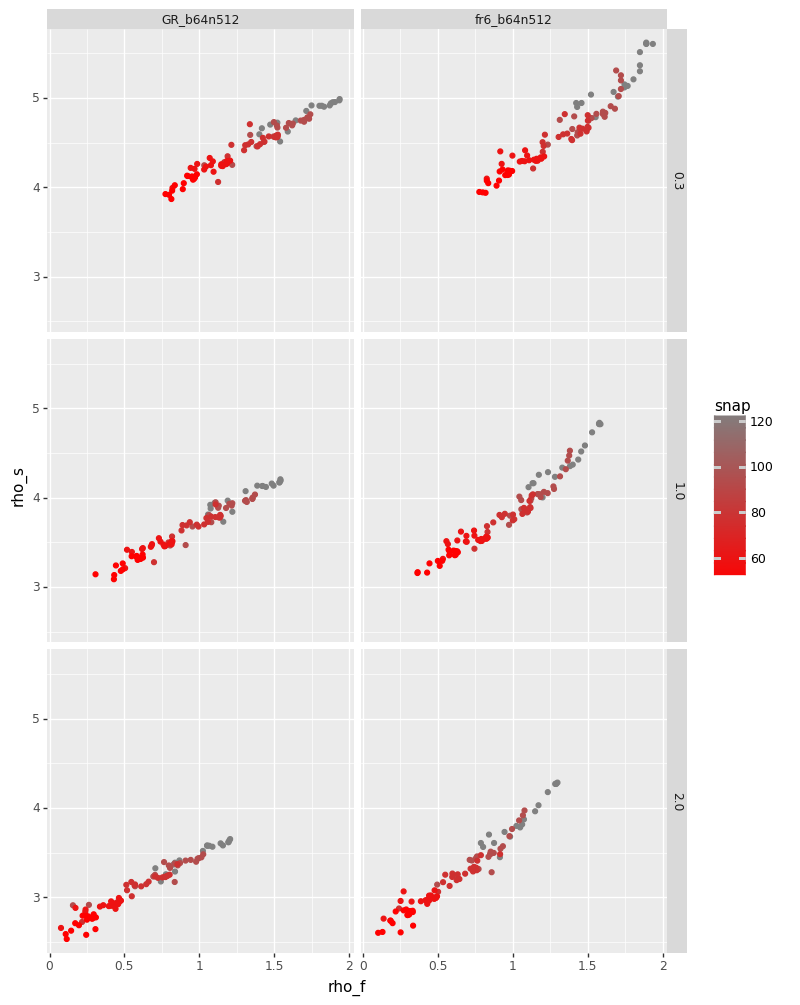

In [10]:
plotnine.options.figure_size = 8, 12

g = (ggplot(
    d[d['f'] == NFW_f],
    aes(
        x='rho_f',
        y='rho_s',
    )) +
    geom_point(aes(
        color='snap',
#         size='bin',
#         shape='grav',
    )) +
    scale_color_desaturate() +
    facet_grid(['rs_f', 'grav']))

_ = g.draw()